In [21]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from matplotlib import pyplot as plt

In [2]:
#zadanie1

In [5]:
boston = load_boston()
feature_names = boston["feature_names"]
data = boston["data"]
X = pd.DataFrame(data, columns=feature_names)
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
y_pred = lr.predict(X_test)

In [12]:
r2_score(y_test,y_pred)

0.711226005748496

In [15]:
#zadanie2
rfr = RandomForestRegressor(random_state = 42, n_estimators = 1000, max_depth = 12)
rfr.fit(X_train,y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
y_pred = rfr.predict(X_test)

In [17]:
r2_score(y_test,y_pred)

0.8749965273218174

лучше подходит линейная регрессия

In [18]:
#zadanie3
? RandomForestRegressor

In [20]:
rfr.feature_importances_

array([0.03211748, 0.00154999, 0.0070941 , 0.0011488 , 0.01436832,
       0.40270459, 0.01424477, 0.06403265, 0.00496762, 0.01169177,
       0.01808961, 0.0123114 , 0.41567892])

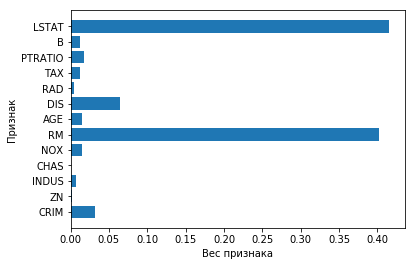

In [22]:
plt.barh(feature_names, rfr.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [23]:
np.sum(rfr.feature_importances_)

0.9999999999999994

2 наиболее важных признака - LSTAT и RM